In [1]:
import jax.numpy as np
import matplotlib.pyplot as plt
import dLux as dl
import dLux.utils as dlu
import jax.random as jr
import dLuxToliman as dlT
import optax
import zodiax as zdx
import jax
from tqdm.notebook import tqdm
import pickle

In [2]:
with open('crb_results.pkl', 'rb') as f:
    data = pickle.load(f)

r_res_crb_alltrials = data['r_res_crb_alltrials']
flux_res_crb_alltrials = data['flux_res_crb_alltrials']
r_res_crb_alltrials_tol = data['r_res_crb_alltrials_tol']
flux_res_crb_alltrials_tol = data['flux_res_crb_alltrials_tol']

In [ ]:
# code from chatgpt because its late and im tired. https://chatgpt.com/c/686cd07d-5c1c-8007-8a38-05392757f222
def compute_mean_and_sem(all_trials_list):
    n_downsamples = len(all_trials_list[0])
    n_trials = len(all_trials_list)

    means = []
    sems = []

    for d in range(n_downsamples):
        # Collect mean over sources for this downsample in each trial
        per_trial_means = [np.mean(all_trials_list[trial][d]) for trial in range(n_trials)]
        per_trial_means = np.array(per_trial_means)

        # Mean over trials
        mean = np.mean(per_trial_means)

        # SEM over trials
        sem = np.std(per_trial_means, ddof=1) / np.sqrt(n_trials)

        means.append(mean)
        sems.append(sem)

    return np.array(means), np.array(sems)

In [24]:
r_means, r_sems = compute_mean_and_sem(r_res_crb_alltrials)
flux_means, flux_sems = compute_mean_and_sem(flux_res_crb_alltrials)
r_means_tol, r_sems_tol = compute_mean_and_sem(r_res_crb_alltrials_tol)
flux_means_tol, flux_sems_tol = compute_mean_and_sem(flux_res_crb_alltrials_tol)
# sampling rates relative to nyquist
sampling = np.array([1/4, 1/2, 1, 2, 4, 8])
plt.style.use('sty.mplstyle')
import matplotlib.patheffects as pe
text_path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()]
path_effects = [pe.Stroke(linewidth=6, foreground='k'), pe.Normal()]

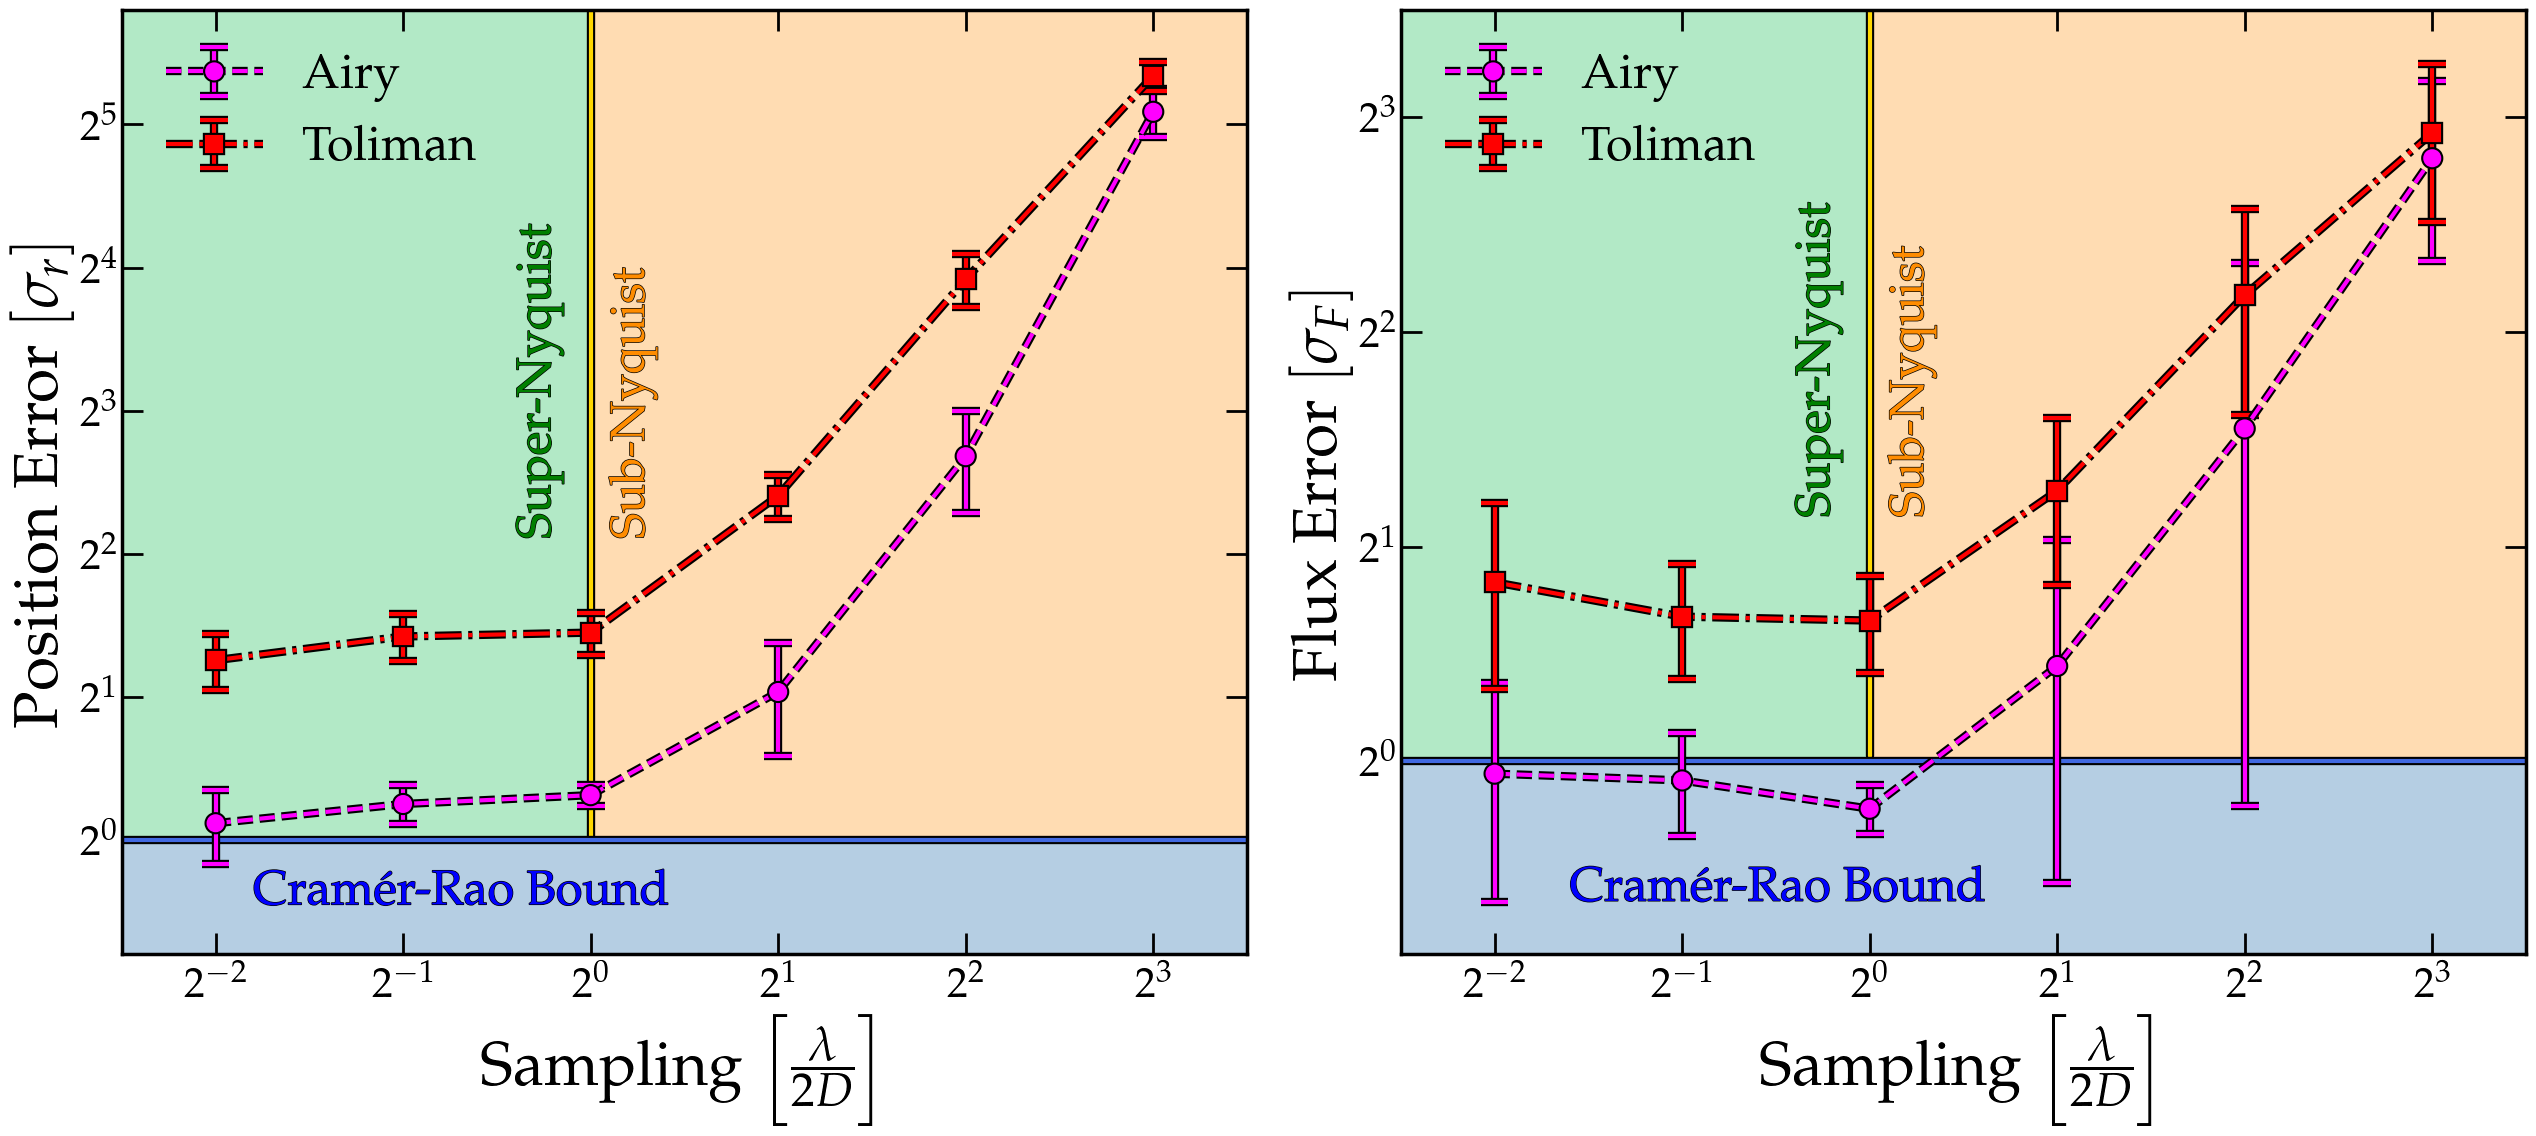

In [ ]:
plt.figure(figsize=(26,12))
plt.subplot(1,2,1)
# lines indicating cramer rao bound and nyquist freqs
plt.axvline(1, 0.125, 1, path_effects = path_effects, color='gold')
plt.axhline(1, path_effects = path_effects, color='royalblue')

# filling
plt.fill_between(np.array([0,16]), 0, 1, alpha=0.3)
plt.fill_between(np.array([0,1]), 1, 64, alpha=0.3)
plt.fill_between(np.array([1,16]), 1, 64, alpha=0.3, color='darkorange')

plt.errorbar(sampling, r_means, yerr=r_sems*2, 
             capsize=10, marker='o', ms=10, mew=3, linestyle='--', path_effects=path_effects,
             label='Airy', color='magenta')
plt.errorbar(sampling, r_means_tol, yerr=r_sems_tol*2,
             capsize=10, marker='s', ms=10, mew=3, linestyle='-.', path_effects=path_effects,
             label='Toliman', color='red')

plt.text(2**(-1.8),2**(-0.45),'Cramér-Rao Bound', path_effects=text_path_effects, color='blue', fontsize=35)
plt.text(2**(-0.4),2**(2.2),'Super-Nyquist', path_effects=text_path_effects, color='green', fontsize=35,rotation=90)
plt.text(2**(0.1),2**(2.2),'Sub-Nyquist', path_effects=text_path_effects, color='darkorange', fontsize=35,rotation=90)

plt.xlabel(r'Sampling $\left[\frac{\lambda}{2 D}\right]$')
plt.ylabel(r'Position Error $\left[\sigma_r\right]$')
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xlim(2**(-2.5),2**(3.5))
plt.ylim(2**(-0.8),2**(5.8))
plt.legend()

plt.subplot(1,2,2)
# lines indicating cramer rao bound and nyquist freqs
plt.axvline(1, 0.21, 1, path_effects = path_effects, color='gold')
plt.axhline(1, path_effects = path_effects, color='royalblue')

# filling
plt.fill_between(np.array([0,16]), 0, 1, alpha=0.3)
plt.fill_between(np.array([0,1]), 1, 64, alpha=0.3)
plt.fill_between(np.array([1,16]), 1, 64, alpha=0.3, color='darkorange')

plt.errorbar(sampling, flux_means, yerr=flux_sems*2, 
             capsize=10, marker='o', ms=10, mew=3, linestyle='--', path_effects=path_effects,
             label='Airy', color='magenta')
plt.errorbar(sampling, flux_means_tol, yerr=flux_sems_tol*2,
             capsize=10, marker='s', ms=10, mew=3, linestyle='-.', path_effects=path_effects,
             label='Toliman', color='red')

plt.text(2**(-1.6),2**(-0.65),'Cramér-Rao Bound', path_effects=text_path_effects, color='blue', fontsize=35)
plt.text(2**(-0.4),2**(1.2),'Super-Nyquist', path_effects=text_path_effects, color='green', fontsize=35,rotation=90)
plt.text(2**(0.1),2**(1.2),'Sub-Nyquist', path_effects=text_path_effects, color='darkorange', fontsize=35,rotation=90)

plt.xlabel(r'Sampling $\left[\frac{\lambda}{2 D}\right]$')
plt.ylabel(r'Flux Error $\left[\sigma_F\right]$')
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xlim(2**(-2.5),2**(3.5))
plt.ylim(2**(-0.9),2**(3.5))
plt.legend()

plt.tight_layout()
#plt.savefig('crowded_nyquist_plot.pdf', transparent=False, bbox_inches='tight')
#plt.savefig('crowded_nyquist_plot.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()